In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [64]:
df = pd.read_csv("car_evaluation.csv")

In [65]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [66]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [67]:
for columns in df.columns:
    print(columns)

vhigh
vhigh.1
2
2.1
small
low
unacc


In [68]:
df.columns = col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [69]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [70]:
df["class"].count()

1727

In [71]:
for col in df.columns:
    print(df[f"{col}"].count())

1727
1727
1727
1727
1727
1727
1727


In [72]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [73]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import category_encoders as ce

In [75]:
X = df.drop(["class"],axis=1)
y = df["class"]

In [76]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [81]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=42)


In [86]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [88]:
y_pred = clf_gini.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score

In [92]:
print("Accuracy: ", accuracy_score(y_test,y_pred))


Accuracy:  0.8930635838150289


In [94]:
y_pred_train = clf_gini.predict(X_train)
y_pred_train

array(['unacc', 'acc', 'unacc', ..., 'unacc', 'unacc', 'vgood'],
      dtype=object)

In [107]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 0.8979
Test set score: 0.8931


In [112]:
def plot_tree_model(clf, feature_names,class_names):
    plt.figure(figsize=(20,10))
    plot_tree(clf,feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.show()





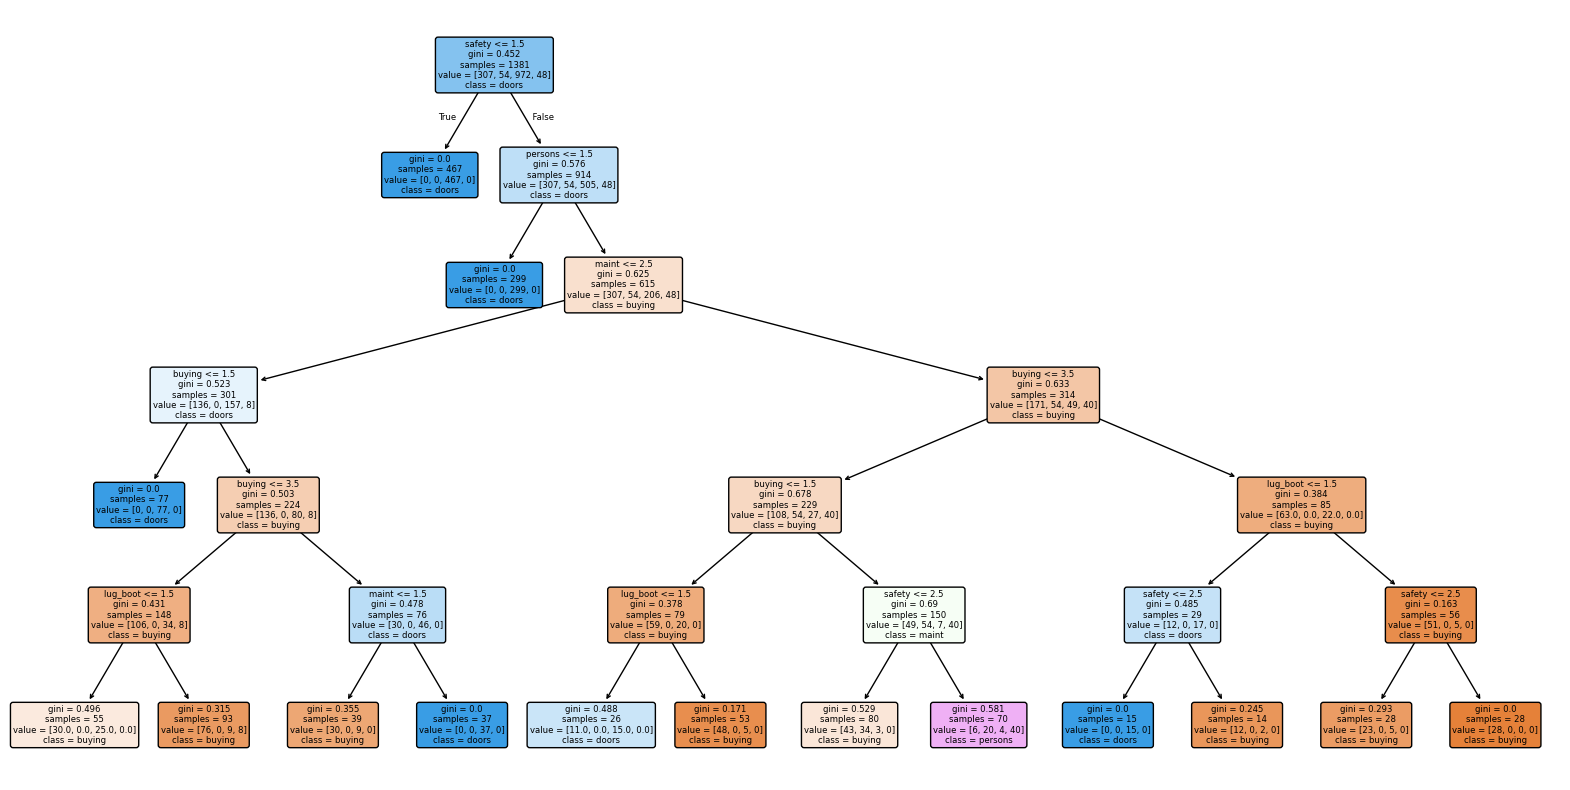

In [113]:
dt = plot_tree_model(clf_gini,['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [116]:
from sklearn.metrics import confusion_matrix

In [125]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 70,   0,   3,   4],
       [  5,   0,   0,  10],
       [ 10,   0, 227,   0],
       [  5,   0,   0,  12]], dtype=int64)

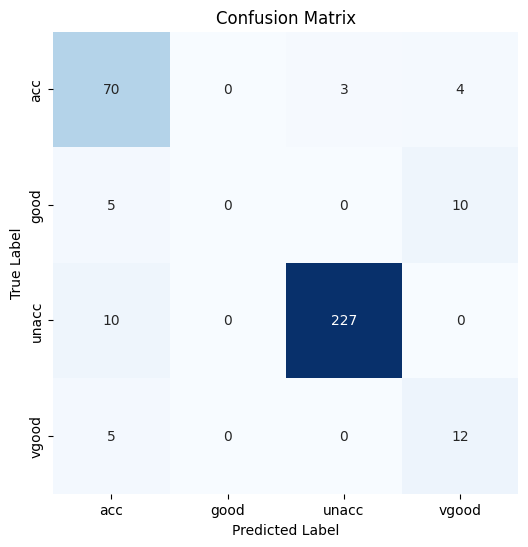

In [140]:
from sklearn.metrics import confusion_matrix

class_names = ['acc', 'good', 'unacc', 'vgood']
plt.figure(figsize=(6, 6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_names, yticklabels=class_names)
class_names = ['acc', 'good', 'unacc', 'vgood']
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



plt.show()